In [88]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [89]:
eval_metrics = context.catalog.load("evaluation_metrics")

2021-06-30 18:39:09,879 - kedro.io.data_catalog - INFO - Loading data from `evaluation_metrics` (JSONDataSet)...


In [90]:
for split in eval_metrics:
    print(split['classification_report'])
    print('')

                                                           precision    recall  f1-score   support

StatQuest_ Linear Models Pt.1 - Linear Regression.mp4.csv       1.00      1.00      1.00         1
                                                  missing       1.00      0.50      0.67         2
                                    videoplayback.mp4.csv       0.50      1.00      0.67         1

                                                 accuracy                           0.75         4
                                                macro avg       0.83      0.83      0.78         4
                                             weighted avg       0.88      0.75      0.75         4


                       precision    recall  f1-score   support

              missing       0.00      0.00      0.00         1
 video_errors.mp4.csv       0.00      0.00      0.00         1
videoplayback.mp4.csv       1.00      1.00      1.00         1
 zoom_0_short.mp4.csv       0.50      1.00      0.

In [91]:
def pretty_confusion_matrix(true, pred):
    data = confusion_matrix(true, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(true), index = np.unique(true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (7,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    

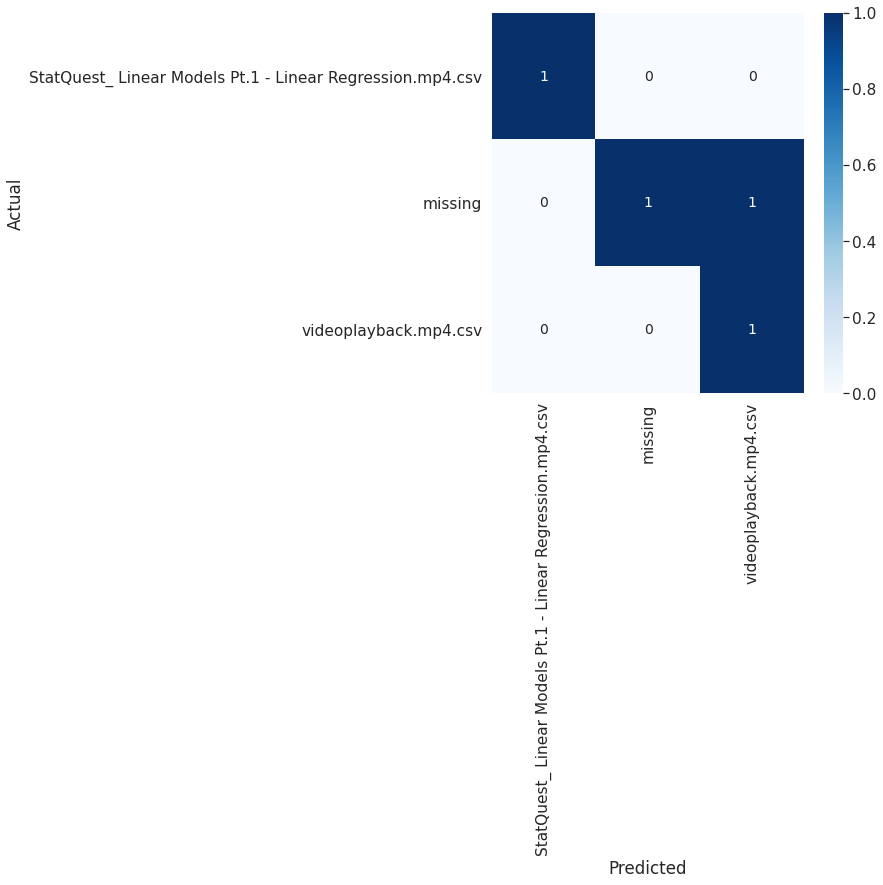

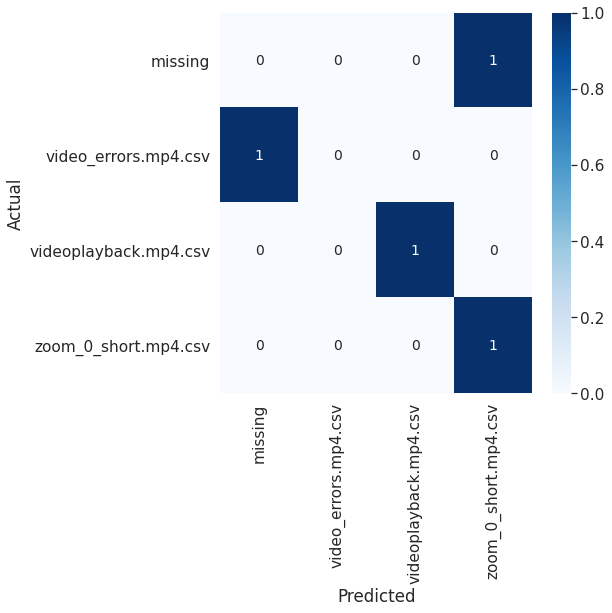

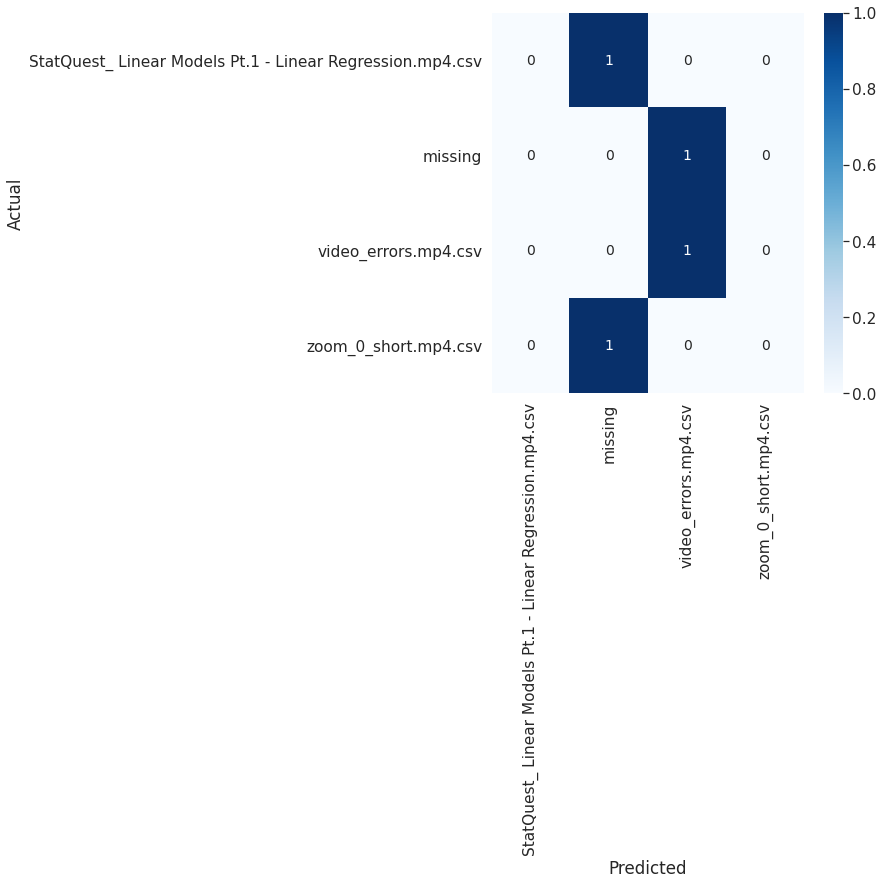

In [92]:
for split in eval_metrics:
    pretty_confusion_matrix(split['true_labels'], split['pred_labels'])
    plt.show()


In [93]:
for split in eval_metrics:
    print(split['true_labels'])
    print(split['pred_scores'])
    print()


['missing', 'StatQuest_ Linear Models Pt.1 - Linear Regression.mp4.csv', 'missing', 'videoplayback.mp4.csv']
[{'videoplayback.mp4.csv': 5.0}, {'StatQuest_ Linear Models Pt.1 - Linear Regression.mp4.csv': 9.0}, {'videoplayback.mp4.csv': 13.0}, {'videoplayback.mp4.csv': 71.0}]

['zoom_0_short.mp4.csv', 'missing', 'video_errors.mp4.csv', 'videoplayback.mp4.csv']
[{'zoom_0_short.mp4.csv': 9.0}, {'zoom_0_short.mp4.csv': 8.0}, {'video_errors.mp4.csv': 3.0}, {'video_errors.mp4.csv': 1.0, 'videoplayback.mp4.csv': 51.0}]

['zoom_0_short.mp4.csv', 'StatQuest_ Linear Models Pt.1 - Linear Regression.mp4.csv', 'video_errors.mp4.csv', 'missing']
[{'zoom_0_short.mp4.csv': 4.0}, {'StatQuest_ Linear Models Pt.1 - Linear Regression.mp4.csv': 4.0}, {'video_errors.mp4.csv': 9.0}, {'video_errors.mp4.csv': 10.0, 'zoom_0_short.mp4.csv': 4.0}]

